In [1]:
import keras
from keras.datasets import mnist
from matplotlib import pyplot

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

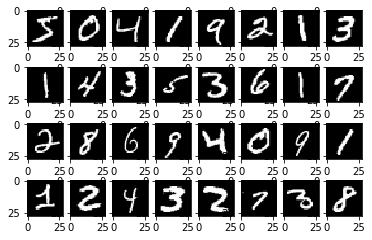

In [3]:
for i in range(0, 32):
    pyplot.subplot(4, 8, i + 1)
    pyplot.imshow(X_train[i], cmap='gray')
    
pyplot.show()

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
X_train = X_train.reshape(-1, 784).astype('float32') / 255
X_test = X_test.reshape(-1, 784).astype('float32') / 255
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
y_train = keras.utils.np_utils.to_categorical(y_train.astype('int32'), 10)
y_test = keras.utils.np_utils.to_categorical(y_test.astype('int32'), 10)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [7]:
in_size = 28 * 28
out_size = 10

Dense = keras.layers.Dense
model = keras.models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(in_size,)))
model.add(Dense(out_size, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=20, epochs=20)


Epoch 1/20
60000/60000 [==============================] - 18s 302us/step - loss: 0.1901 - accuracy: 0.9442
Epoch 2/20
60000/60000 [==============================] - 18s 299us/step - loss: 0.0779 - accuracy: 0.9759
Epoch 3/20
60000/60000 [==============================] - 18s 294us/step - loss: 0.0506 - accuracy: 0.9841
Epoch 4/20
60000/60000 [==============================] - 18s 296us/step - loss: 0.0358 - accuracy: 0.9885
Epoch 5/20
60000/60000 [==============================] - 17s 292us/step - loss: 0.0288 - accuracy: 0.9907
Epoch 6/20
60000/60000 [==============================] - 17s 291us/step - loss: 0.0229 - accuracy: 0.9923
Epoch 7/20
60000/60000 [==============================] - 17s 292us/step - loss: 0.0187 - accuracy: 0.9933
Epoch 8/20
60000/60000 [==============================] - 18s 298us/step - loss: 0.0148 - accuracy: 0.9948
Epoch 9/20
60000/60000 [==============================] - 18s 293us/step - loss: 0.0142 - accuracy: 0.9952
Epoch 10/20
60000/60000 [===========

In [9]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: ", score[1], "Loss: ", score[0])

10000/10000 [==============================] - 0s 19us/step
Accuracy:  0.9807000160217285 Loss:  0.14575632145045667


In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [11]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(in_size,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(out_size, activation='softmax'))

In [12]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

In [13]:
hist = model.fit(X_train, y_train,
                batch_size=128,
                epochs=50,
                verbose=1,
                validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 90us/step - loss: 0.2483 - accuracy: 0.9234 - val_loss: 0.1189 - val_accuracy: 0.9621
Epoch 2/50
60000/60000 [==============================] - 5s 90us/step - loss: 0.1034 - accuracy: 0.9676 - val_loss: 0.0977 - val_accuracy: 0.9694
Epoch 3/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.0741 - accuracy: 0.9776 - val_loss: 0.0797 - val_accuracy: 0.9771
Epoch 4/50
60000/60000 [==============================] - 5s 85us/step - loss: 0.0605 - accuracy: 0.9824 - val_loss: 0.0667 - val_accuracy: 0.9823
Epoch 5/50
60000/60000 [==============================] - 5s 85us/step - loss: 0.0500 - accuracy: 0.9852 - val_loss: 0.0756 - val_accuracy: 0.9807
Epoch 6/50
60000/60000 [==============================] - 5s 85us/step - loss: 0.0432 - accuracy: 0.9874 - val_loss: 0.0817 - val_accuracy: 0.9813
Epoch 7/50
60000/60000 [==============================] - 5s 84us/st

In [14]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: ", score[1], "Loss: ", score[0])

10000/10000 [==============================] - 0s 25us/step
Accuracy:  0.9825999736785889 Loss:  0.19622829351210147


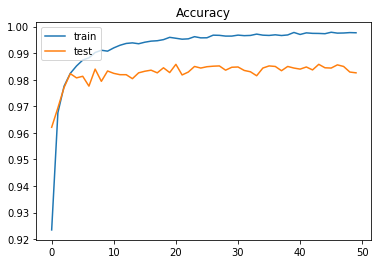

In [15]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

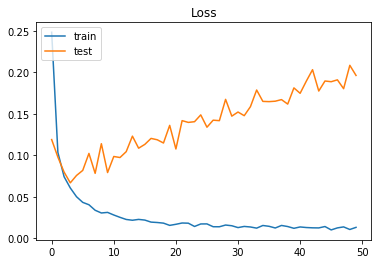

In [16]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
from keras.layers import Flatten, Conv2D, MaxPooling2D

In [18]:
im_rows = 28
im_cols = 28
im_color = 1
in_shape = (im_rows, im_cols, im_color)
out_size = 10

In [19]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, im_rows, im_cols, im_color)
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape(-1, im_rows, im_cols, im_color)
X_test = X_test.astype('float32') / 255
y_train = keras.utils.np_utils.to_categorical(y_train.astype('int32'), 10)
y_test = keras.utils.np_utils.to_categorical(y_test.astype('int32'), 10)

In [20]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=in_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(out_size, activation='softmax'))

In [21]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

In [22]:
hist = model.fit(X_train, y_train,
                batch_size=128,
                epochs=12,
                verbose=1,
                validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 60s 997us/step - loss: 0.2169 - accuracy: 0.9337 - val_loss: 0.0533 - val_accuracy: 0.9826
Epoch 2/12
60000/60000 [==============================] - 59s 987us/step - loss: 0.0812 - accuracy: 0.9763 - val_loss: 0.0405 - val_accuracy: 0.9870
Epoch 3/12
60000/60000 [==============================] - 60s 994us/step - loss: 0.0632 - accuracy: 0.9815 - val_loss: 0.0364 - val_accuracy: 0.9883
Epoch 4/12
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0552 - accuracy: 0.9840 - val_loss: 0.0346 - val_accuracy: 0.9895
Epoch 5/12
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0498 - accuracy: 0.9861 - val_loss: 0.0327 - val_accuracy: 0.9899
Epoch 6/12
60000/60000 [==============================] - 60s 1000us/step - loss: 0.0484 - accuracy: 0.9858 - val_loss: 0.0294 - val_accuracy: 0.9917
Epoch 7/12
60000/60000 [==============================] - 6

In [23]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: ", score[1], "Loss: ", score[0])

10000/10000 [==============================] - 2s 205us/step
Accuracy:  0.9901999831199646 Loss:  0.0402993337411627


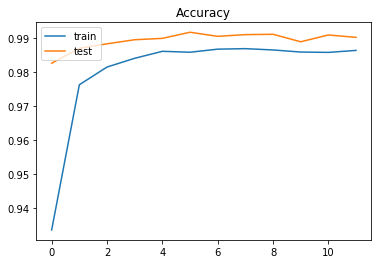

In [24]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

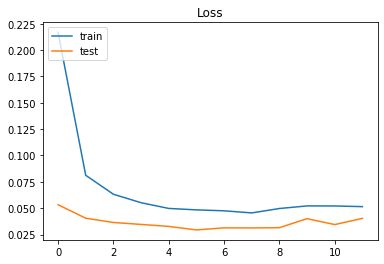

In [25]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()